In [2]:
%run start.py

In [4]:
uselog = pd.read_csv('data/use_log.csv')
uselog.isnull().sum()

log_id         0
customer_id    0
usedate        0
dtype: int64

In [6]:
uselog.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [10]:
customer=pd.read_csv('data/customer_join4.csv')
customer.isnull().sum()


customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
calc_date           0
membership_p        0
dtype: int64

In [14]:
customer_clustering = customer[["mean","median","max","min","membership_p"]]
customer_clustering.head()

,mean,median,max,min,membership_p
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


In [ ]:
from sklearn.preprocessing import StandardScaler ##  표준화를 위해 임포트

In [18]:
sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(customer_clustering)
customer_clustering_sc

array([[-0.28120614, -0.13367635,  0.08117747, -0.5336197 ,  2.03402524],
       [-0.14054502, -0.13367635, -0.37992814, -0.02114919,  2.03402524],
       [-0.42186727, -0.13367635, -0.84103375, -0.02114919,  2.03402524],
       ...,
       [ 1.50050144,  1.46662237,  0.08117747,  2.54120338, -1.28811491],
       [ 3.18843493,  3.06692109,  1.46449428,  4.07861492, -1.28811491],
       [ 2.62579043,  2.53348819,  1.00338868,  3.56614441, -1.28811491]])

In [ ]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters=4, random_state=41)  ###  클러스터링 모델구축 (그룹 4개로 지정)
clusters = kmeans.fit(customer_clustering_sc)  ###  클러스터링 실행

customer_clustering["cluster"] = clusters.labels_   ###  클러스터링 결과 저장

# 클러스터링 결과 저장
# customer_clustering["cluster"] = kmeans.labels_  # labels_는 kmeans 객체에 저장됨

print(customer_clustering["cluster"].unique())   ## 데이터 그룹 개수와 각 번호
customer_clustering   ## 확인

[0 1 2 3]


,mean,median,max,min,membership_p,cluster
0,4.833333,5.0,8,2,47,0
1,5.083333,5.0,7,3,47,0
2,4.583333,5.0,6,3,47,0
3,4.833333,4.5,7,2,47,0
4,3.916667,4.0,6,1,47,0
...,...,...,...,...,...,...
4187,8.000000,8.0,8,8,1,3
4188,10.000000,10.0,10,10,1,3
4189,8.000000,8.0,8,8,1,3
4190,11.000000,11.0,11,11,1,3


In [24]:
customer_clustering.to_csv("data/customer_clustering2.csv",index=False)

In [26]:
df = pd.read_csv('data/customer_clustering2.csv')
df

,mean,median,max,min,membership_p,cluster
0,4.833333,5.0,8,2,47,0
1,5.083333,5.0,7,3,47,0
2,4.583333,5.0,6,3,47,0
3,4.833333,4.5,7,2,47,0
4,3.916667,4.0,6,1,47,0
...,...,...,...,...,...,...
4187,8.000000,8.0,8,8,1,3
4188,10.000000,10.0,10,10,1,3
4189,8.000000,8.0,8,8,1,3
4190,11.000000,11.0,11,11,1,3


<Axes: xlabel='cluster', ylabel='min'>

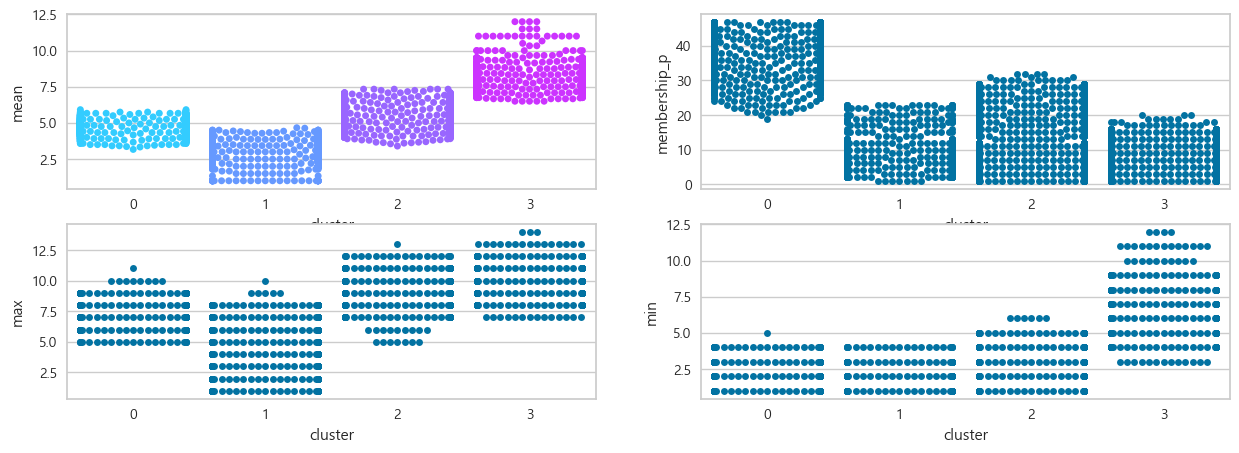

In [28]:
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.swarmplot(x="cluster", y="mean", data=df,  ax=ax1, palette='cool') 
sns.swarmplot(x="cluster", y="membership_p", data=df, ax=ax2)
sns.swarmplot(x="cluster", y="max", data=df, ax=ax3)
sns.swarmplot(x="cluster", y="min", data=df, ax=ax4)

In [29]:
df.columns = ["월평균값","월중앙값", "월최대값", "월최소값","회원기간", "cluster"]
df

,월평균값,월중앙값,월최대값,월최소값,회원기간,cluster
0,4.833333,5.0,8,2,47,0
1,5.083333,5.0,7,3,47,0
2,4.583333,5.0,6,3,47,0
3,4.833333,4.5,7,2,47,0
4,3.916667,4.0,6,1,47,0
...,...,...,...,...,...,...
4187,8.000000,8.0,8,8,1,3
4188,10.000000,10.0,10,10,1,3
4189,8.000000,8.0,8,8,1,3
4190,11.000000,11.0,11,11,1,3


In [32]:
df.groupby("cluster").count()

,월평균값,월중앙값,월최대값,월최소값,회원기간
cluster,,,,,
0,1249,1249,1249,1249,1249
1,771,771,771,771,771
2,1334,1334,1334,1334,1334
3,838,838,838,838,838
